In [1]:
import mmf_setup
try: mmf_setup.nbinit()
except: import nbinit

<IPython.core.display.Javascript object>

# Thomas-Fermi Completion

Here we tabulate the various integrands required for homogeneous quantities.  These are implemented in the `tf_completion.py` file.

$$
  \newcommand{\E}{\mathcal{E}}
  \newcommand{\e}{\epsilon}
  \mat{M} = \begin{pmatrix}
    \overbrace{\frac{\hbar^2k_a^2}{2m_a} - \mu_a}^{\e_a} & \Delta\\
    \Delta^\dagger & - \underbrace{\left(\frac{\hbar^2k_b^2}{2m_b} - \mu_b\right)}_{\e_b}
  \end{pmatrix},\\
  \e_{\pm} = \frac{\e_a \pm \e_b}{2}, \qquad
  \omega_{\pm} = \e_- \pm \overbrace{\sqrt{\e_+^2 + \abs{\Delta}^2}}^{E},
$$
\begin{align}
  \newcommand{\intdk}{\int \frac{\d^d{k}}{(2\pi)^d}\;}
  n_+ &= \intdk\overbrace{\left(1 - \frac{\epsilon^+_k}{E_k}
               \underbrace{\bigl(f_\beta(\omega_-) - f_\beta(\omega_+)\bigr)}_{f_\nu}
          \right)}^{f_+}, &
  n_- &= \intdk\overbrace{\bigl(f_\beta(\omega_+) - f_\beta(-\omega_-)\bigr)}^{f_-},\\
  n_a &= \intdk\overbrace{\frac{f_+ + f_-}{2}}^{f_a}, &
  n_b &= \intdk\overbrace{\frac{f_+ - f_-}{2}}^{f_a},\\
  \tau_a &= \intdk k_a^2f_a, &
  \tau_b &= \intdk k_b^2f_b,\\
  \tau_+ &= \intdk (k_a^2f_a + k_b^2f_b), &
  \tau_- &= \intdk (k_a^2f_a - k_b^2f_b),\\
  \nu &= -\intdk\frac{\Delta}{2E}
  \overbrace{\bigl(f_\beta(\omega_-)-f_\beta(\omega_+)\bigr)}^{f_\nu}, &
  \kappa &= \intdk \left(
    \frac{\hbar^2k_a^2}{2m_a}f_a + \frac{\hbar^2k_b^2}{2m_b}f_b 
    - \frac{\abs{\Delta}^2}{2E}f_\nu\right),\\
  \tilde{C} &= \frac{1}{2}\intdk \left(
    \frac{1}{\epsilon_+ + \I 0^+} - \frac{f_\nu}{E}\right).
\end{align}

## Series

Some of these integrals converge poorly and are subject to roundoff error, so we consider the following series expansions valid at $T=0$ for $k_c$ large enough that $\omega_- < 0$ and $\omega_+ > 0$:

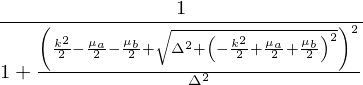

In [2]:
#  Here we use sympy to generate the series expansion in k_c
import sympy;sympy.init_printing()
k, mu_a, mu_b = sympy.var('k, mu_a, mu_b', real=True)
d = sympy.var(r'\Delta', positive=True)
np = sympy
np.arctan2 = np.atan2
np.angle = np.arg
a = k**2/2 - mu_a
b = k**2/2 - mu_b
e_m, e_p = (a-b)/2, (a+b)/2
E = np.sqrt(e_p**2 + d**2)
es = [e_m-E, e_m+E]
thetas = np.arctan2(-E-e_p, d), np.atan2(E-e_p, d)
us = np.exp(1j*np.angle(d))*list(map(np.cos, thetas))
vs = list(map(np.sin,thetas))
x = sympy.var('x', positive=True)
(abs(us[0])**2)
#.subs(k, 1/x).series(x, n=8).subs(x, 1/k)

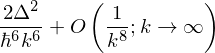

In [10]:
#  Here we use sympy to generate the series expansion in k_c
import sympy;sympy.init_printing()
q, mu_a, mu_b = sympy.var(
    r'q, mu_a, mu_b', real=True)
k, kz, kp, d, h, ma, mb = sympy.var(r'k, k_z, k_\perp, \Delta, \hbar, m_a, m_b', positive=True)
np = sympy
np.arctan2 = np.atan2
np.angle = np.arg
q = 0
ka2, kb2 = (kz - q)**2 + kp**2, (kz + q)**2 + kp**2
ka2, kb2 = k**2, k**2
ea, eb = h**2*ka2/2 - mu_a, h**2*kb2/2 - mu_b
em, ep = (ea-eb)/2, (ea+eb)/2
E = np.sqrt(ep**2 + d**2)
es = [em-E, em+E]
thetas = np.arctan2(-E-ep, d), np.atan2(E-ep, d)
us = np.exp(1j*np.angle(d))*list(map(np.cos, thetas))
vs = list(map(np.sin,thetas))
x = sympy.var('x', positive=True)

# T = 0 occupation factors
f_nu = 1
f_m = 0
n_p = 1 - ep/E
n_a = n_b = n_p/2
tau_a, tau_b = ka2*n_a, kb2*n_b
nu_delta = -f_nu/E/2
C_tilde = nu_delta + 1/2/ep
kappa = h**2*tau_a/2/ma + h**2*tau_b/2/mb + abs(d)*nu_delta
#kappa.subs([(kz, kz/x), (kp, kp/x)]).series(x, n=2).subs(x, 1)
#n_p.subs([(kz, k/x), (kp, k/x)]).series(x, n=8).subs(x, 1)
C_tilde.subs([(k, 1/x)]).series(x, n=8).subs(x, 1/k)

In [40]:
(abs(us[0])**2).subs(ss).subs(kz, 1/x).series(x, n=8)#.subs(x, 1/k)

NotImplementedError: 